In [59]:
import pandas as pd


In [60]:
# Describing the anomalies
features = pd.read_csv('train.csv')
features= features.drop('ID', axis = 1)

features.head(1000)

,MONTH,DAY,YEAR,PL,XC,VL,CI,MT,CT,NV,...,NT,TC,CH,CK,RC,HM,PT,MC,CJ,AVERAGE
0,12,31,2017,3,6,7,5,5,0,0,...,5,9,0,3,0,0,0,0,1,2.588235
1,12,29,2017,0,3,0,1,0,0,0,...,4,4,1,2,0,0,0,0,6,1.235294
2,12,28,2017,0,2,3,2,0,0,0,...,2,5,1,1,0,0,0,0,3,1.117647
3,12,22,2017,0,4,2,3,3,3,2,...,4,8,0,3,0,0,0,0,0,1.882353
4,12,21,2017,1,2,1,4,1,0,2,...,1,0,0,4,0,0,0,0,2,1.058824
5,12,20,2017,1,4,3,0,1,0,4,...,7,6,0,8,0,2,0,0,0,2.117647
6,12,19,2017,0,6,5,3,3,0,4,...,4,5,2,6,0,0,0,0,0,2.235294
7,12,18,2017,0,3,2,2,1,0,0,...,4,3,0,3,0,0,0,0,0,1.352941
8,12,16,2017,7,8,5,10,9,0,0,...,12,10,7,7,0,8,0,0,0,4.882353
9,12,15,2017,0,8,5,7,5,0,0,...,7,3,4,7,0,3,0,0,4,3.235294


In [61]:
# Describing anoma
features.describe()

,MONTH,DAY,YEAR,PL,XC,VL,CI,MT,CT,NV,...,NT,TC,CH,CK,RC,HM,PT,MC,CJ,AVERAGE
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,...,142.000000,142.000000,142.000000,142.00000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,5.760563,15.204225,2017.612676,1.711268,4.035211,1.746479,2.218310,1.204225,0.605634,0.105634,...,3.598592,3.352113,0.478873,3.50000,0.767606,1.647887,0.281690,0.197183,1.126761,1.603148
std,4.052719,8.298115,0.488863,3.708493,7.174039,2.701291,4.024951,2.386542,1.443782,0.554898,...,4.868570,4.835151,1.270049,4.41588,2.242926,2.813839,1.054314,0.610074,1.565855,2.040853
min,1.000000,1.000000,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.117647
25%,2.000000,8.250000,2017.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.647059
50%,4.000000,15.000000,2018.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,2.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.941176
75%,10.000000,21.000000,2018.000000,1.750000,4.000000,2.000000,3.000000,1.000000,0.000000,0.000000,...,4.000000,4.000000,0.000000,4.00000,0.000000,2.000000,0.000000,0.000000,2.000000,1.470588
max,12.000000,31.000000,2018.000000,21.000000,61.000000,12.000000,35.000000,14.000000,8.000000,4.000000,...,26.000000,28.000000,9.000000,26.00000,19.000000,19.000000,8.000000,4.000000,8.000000,12.588235


In [62]:
import numpy as np

In [63]:
labels = np.array(features['AVERAGE'])
feature_list = list(features.columns)
features = np.array(features)

In [64]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.10, random_state = 42)

In [65]:
baseline_preds = test_features

In [66]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [67]:
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.05 degrees.


In [68]:

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.75 %.


In [69]:
#improve model
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)

In [70]:

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)


In [71]:
# Limit depth of tree to 2 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3, random_state=42)
rf_small.fit(train_features, train_labels)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)

In [72]:

# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: AVERAGE              Importance: 0.52
Variable: NT                   Importance: 0.32
Variable: HM                   Importance: 0.04
Variable: XC                   Importance: 0.03
Variable: MT                   Importance: 0.02
Variable: TC                   Importance: 0.02
Variable: CK                   Importance: 0.02
Variable: PL                   Importance: 0.01
Variable: CI                   Importance: 0.01
Variable: RM                   Importance: 0.01
Variable: MONTH                Importance: 0.0
Variable: DAY                  Importance: 0.0
Variable: YEAR                 Importance: 0.0
Variable: VL                   Importance: 0.0
Variable: CT                   Importance: 0.0
Variable: NV                   Importance: 0.0
Variable: CH                   Importance: 0.0
Variable: RC                   Importance: 0.0
Variable: PT                   Importance: 0.0
Variable: MC                   Importance: 0.0
Variable: CJ                   Importance: 0.0


In [73]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features
important_indices = [feature_list.index('PT'), feature_list.index('AVERAGE')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / 17))
accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.02 degrees.
Accuracy: 99.87 %.


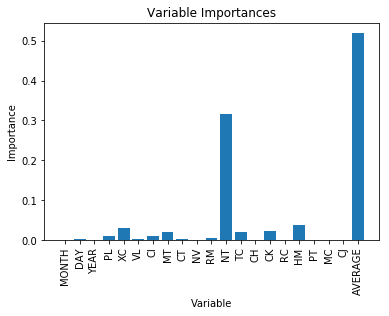

In [74]:
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [75]:
import datetime
# Dates of training values
months = features[:, feature_list.index('MONTH')]
days = features[:, feature_list.index('DAY')]
years = features[:, feature_list.index('YEAR')]

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# Dates of predictions
months = test_features[:, feature_list.index('MONTH')]
days = test_features[:, feature_list.index('DAY')]
years = test_features[:, feature_list.index('YEAR')]

# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

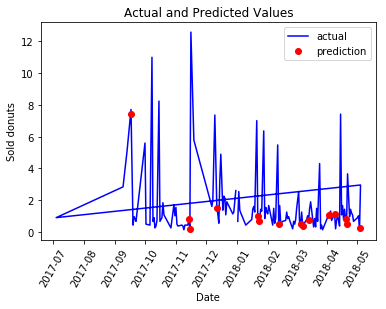

In [76]:
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Date'); plt.ylabel('Sold donuts'); plt.title('Actual and Predicted Values');